<h1><center> EEL410252 – Introdução à Informática Médica </h1></center>

<h1><center> EC2 – Estudo de Caso 2 – Tema 1 </h1></center>



Parte 2 – Efetue a importação da imagem das células dos arquivos em anexo e: <br>
<br>
1. Utilize operações de contraste, brilho e filtros abordadas nas aulas 22 e 23 com o objetivo de realçar os 
contornos das membranas celulares e seus núcleos. <br>

2. Utilizando histograma e limiarização, tente segmentar as duas regiões (núcleo e citoplasma) das células. <br>

3. Investigue a aplicação das técnicas separadamente nos canais de cores e 
na versão convertida em tons de cinza.


# Imports

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

In [2]:
D1 = cv.imread('D1.BMP')
N1 = cv.imread('N1.bmp')

# 1 - Alterando brilho e contraste

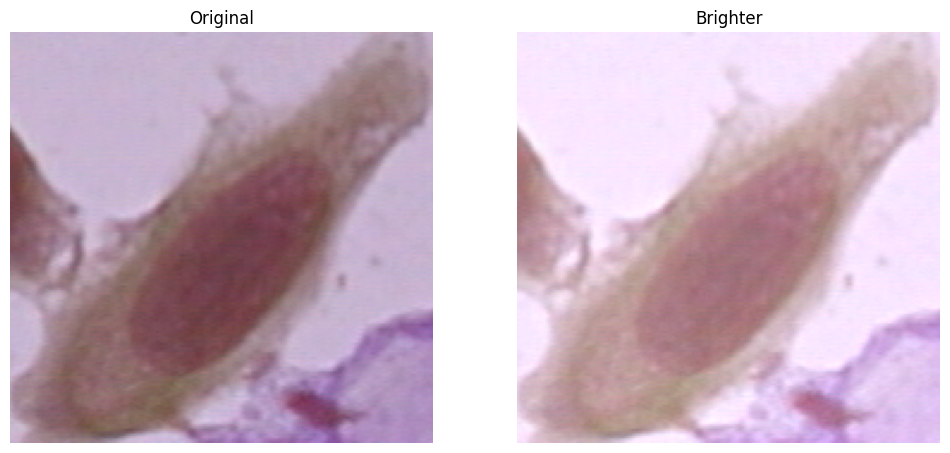

In [3]:
# Brightness 
fix, ax = plt.subplots(1,2, figsize = (12,12))

plt.subplot(1,2,1)
plt.imshow(D1)
plt.title('Original')
plt.axis('off');

_ = 50
plt.subplot(1,2,2)
plt.imshow(np.clip(D1 + (_,_,_), 0, 255).astype(np.uint8))
plt.title('Brighter')
plt.axis('off');


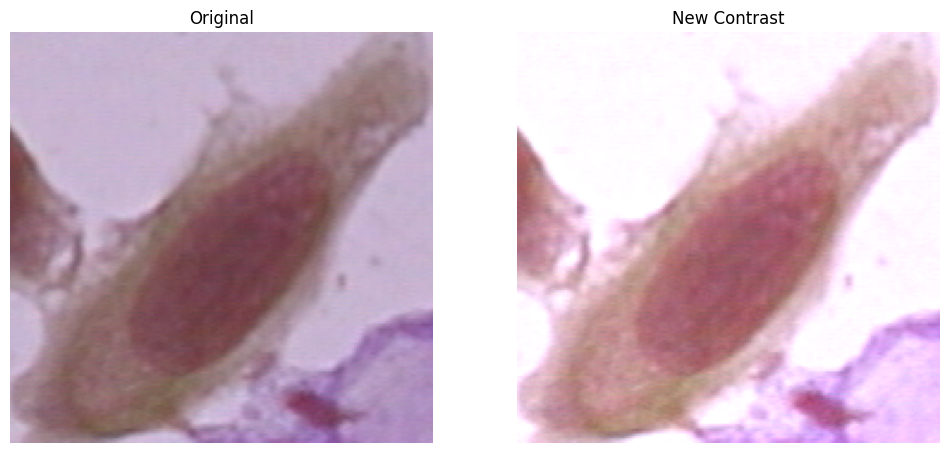

In [4]:
# Contrast  
fix, ax = plt.subplots(1,2, figsize = (12,12))

plt.subplot(1,2,1)
plt.imshow(D1)
plt.title('Original')
plt.axis('off');

_ = 1.4
plt.subplot(1,2,2)
plt.imshow(np.clip(D1*_, 0, 255).astype(np.uint8))
plt.title('New Contrast')
plt.axis('off');


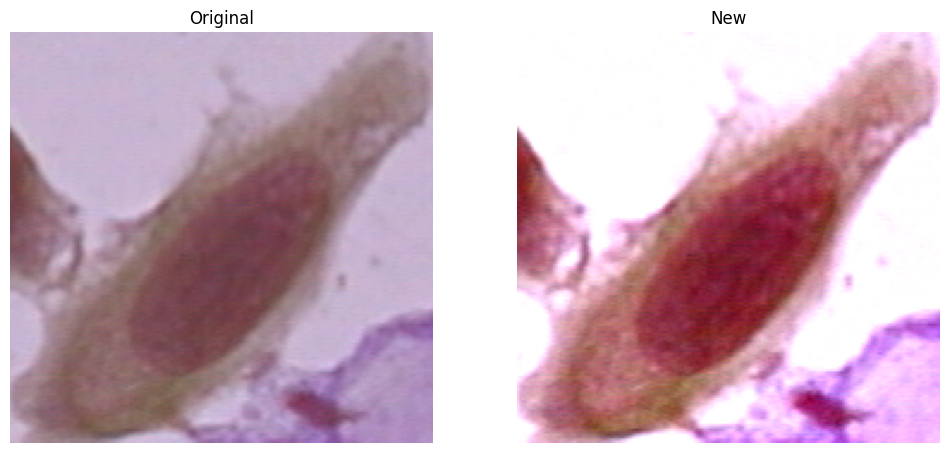

In [5]:
# Change both contrast and brightness

contrast = 2.0
brightness = -100

fix, ax = plt.subplots(1,2, figsize = (12,12))

plt.subplot(1,2,1)
plt.imshow(D1)
image = D1
plt.title('Original')
plt.axis('off');

plt.subplot(1,2,2)
new_image = np.clip(D1*contrast + brightness, 0, 255).astype(np.uint8)
plt.imshow(new_image)
plt.title('New')
plt.axis('off');

# 1- Aplicando filtro de mediana

Text(0.5, 1.0, 'New')

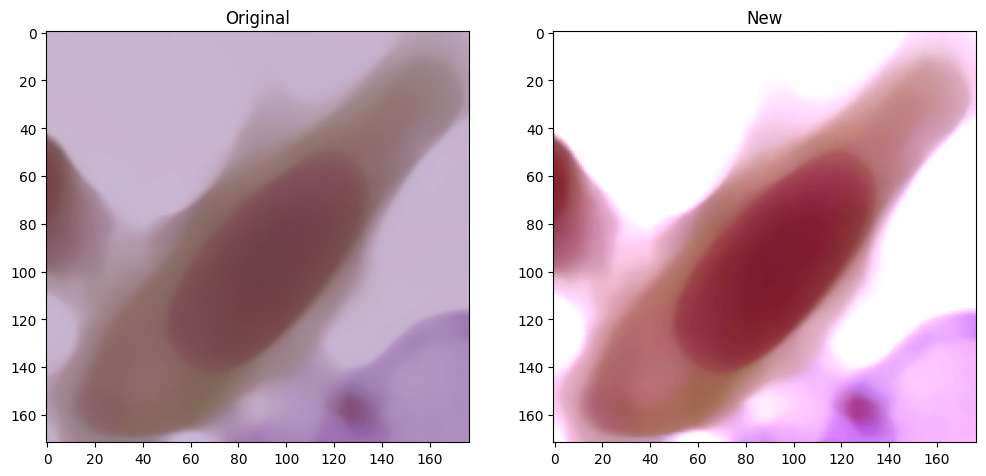

In [6]:
ksize = 19

fix, ax = plt.subplots(1,2, figsize = (12,12))

plt.subplot(1,2,1)
image = cv.medianBlur(image, ksize)
plt.imshow(image)
plt.title('Original')
# plt.axis('off');

plt.subplot(1,2,2)
new_image = cv.medianBlur(new_image, ksize)
plt.imshow(new_image)
plt.title('New')
# plt.axis('off');

# 2- Histograma 

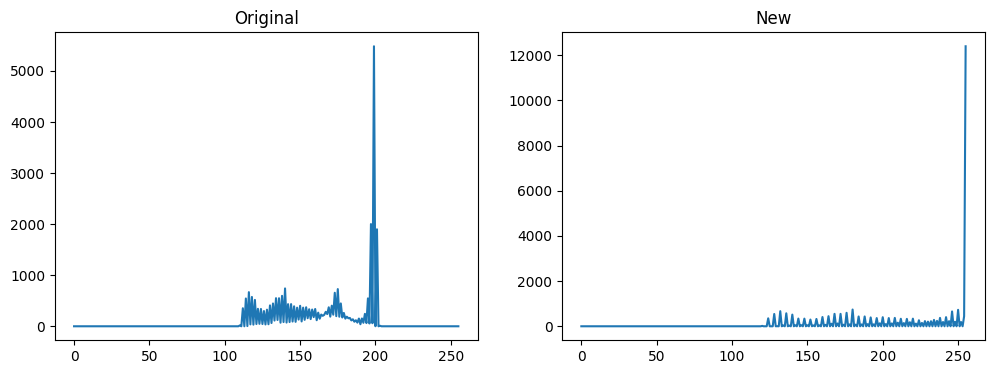

In [7]:
fix, ax = plt.subplots(1,2, figsize = (12,4))
channel = 0

plt.subplot(1,2,1)
plt.title('Original')
hist = cv.calcHist([image],[channel],None,[256],[0,256]) # image, channel, mask (None = full image), hist size (bin), range of values.
plt.plot(hist)

plt.subplot(1,2,2)
plt.title('New')
new_hist = cv.calcHist([new_image],[channel],None,[256],[0,256]) # image, channel, mask (None = full image), hist size (bin), range of values.
plt.plot(new_hist)

YCrCb_image = cv.cvtColor(image, cv.COLOR_BGR2YCrCb)
channels = cv.split(YCrCb_image)

.# channels = cv.equalizeHist(c1), cv.equalizeHist(c2), cv.equalizeHist(c3)
cv.equalizeHist(channels[0], channels[0])

equalized_image = cv.merge(channels, YCrCb_image)

bgr_image = cv.cvtColor(equalized_image, cv.COLOR_YCrCb2BGR)

plt.imshow(bgr_image)

fix, ax = plt.subplots(1,2, figsize = (12,4))
channel = 0

plt.subplot(1,2,1)
plt.title('Original')
hist = cv.calcHist([bgr_image],[channel],None,[256],[0,256]) # image, channel, mask (None = full image), hist size (bin), range of values.
plt.plot(hist)

plt.subplot(1,2,2)
plt.title('New')
new_hist = cv.calcHist([new_image],[channel],None,[256],[0,256]) # image, channel, mask (None = full image), hist size (bin), range of values.
plt.plot(new_hist)

# 2- Limiarização

somente com o processo de limiarização, não é uma tarefa fácil realizar a segmentação do núcleo e citoplasma, <br>
pois as imagens variam de cores entre si, desta forma sendo difícil generalizar um threshold para a limiarização. <br>
mostraremos abaixo no entanto que é possível realizar a segmentação para uma imagem. <br> 

De modo a deixar o processo automatizado, teria-se que encontrar uma maneira de obter a faixa de cor do núcleo e do citoplasma, <br>
e garantir que esta faixa é a mesma para todas as imagens.

[  0 255]


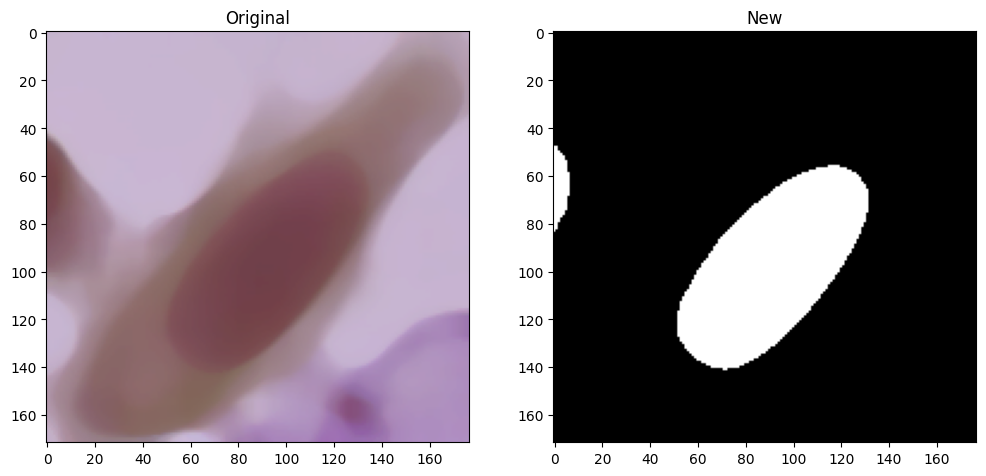

In [8]:
# applying threshold for a range of values, to know the correct color, we are reading the value from the image after median filter.
# if we can assure that the color of the nucleus and cytoplasm are the same for any image, then the process can be automated.

x, y, c = image[100][100] # nucleus color.
# print(x, y, c )

j, k, l = 20, 20, 20 # adding some range to the color.


hsv_lower = np.array([np.clip(x-j, 0, 255), np.clip(y-k, 0, 255), np.clip(c-l, 0, 255)])
hsv_higher = np.array([np.clip(x+j, 0, 255), np.clip(y+k, 0, 255), np.clip(c+l, 0, 255)])

# print(hsv_lower, hsv_higher)

range_image = cv.inRange(image, hsv_lower, hsv_higher)

fix, ax = plt.subplots(1,2, figsize = (12,12))

plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original')
# plt.axis('off');

plt.subplot(1,2,2)
plt.imshow(range_image, cmap = 'gray')
plt.title('New')

nucleus = range_image
print(np.unique(nucleus))

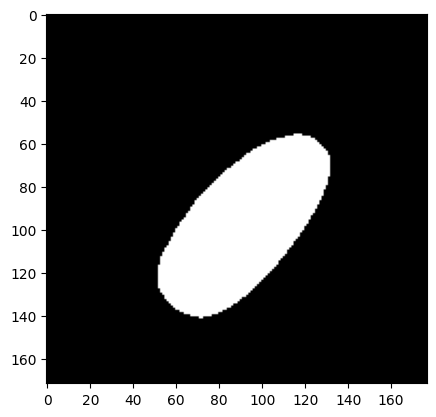

In [9]:
# eroding to remove noise and then dilate to return region of interest to original size.

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(17,17))
erode = cv.erode(nucleus, kernel = kernel)
plt.imshow(erode, cmap='gray')

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(17,17))
dilate = cv.dilate(erode, kernel = kernel)
plt.imshow(dilate, cmap='gray')

nucleus = dilate/255

In [10]:
print(np.unique(nucleus))

[0. 1.]


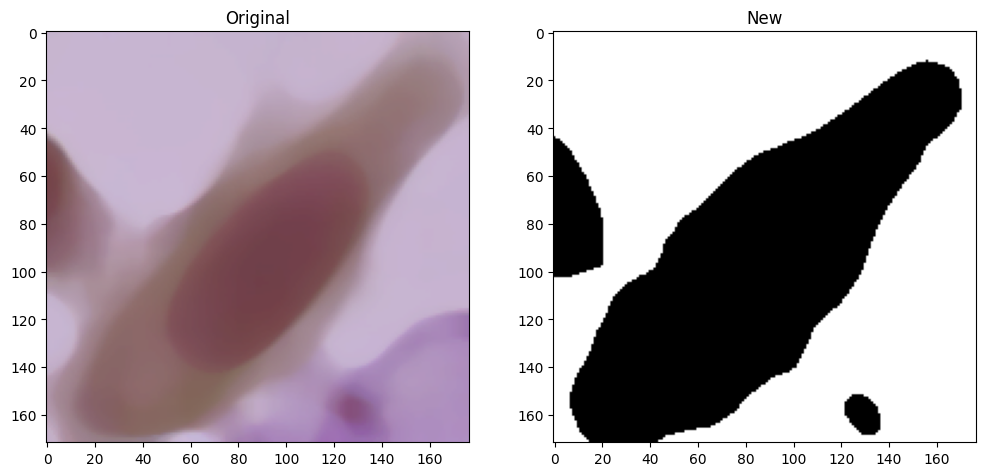

In [11]:
# doing the same to segment the cytoplasm.

x, y, c = image[160][100] # cytoplasm color.
# print(x, y, c )

j, k, l = 50, 50, 50 # range of color.


hsv_lower = np.array([np.clip(x-j, 0, 255), np.clip(y-k, 0, 255), np.clip(c-l, 0, 255)])
hsv_higher = np.array([np.clip(x+j, 0, 255), np.clip(y+k, 0, 255), np.clip(c+l, 0, 255)])

# print(hsv_lower, hsv_higher)

range_image = cv.inRange(image, hsv_lower, hsv_higher)

fix, ax = plt.subplots(1,2, figsize = (12,12))

plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original')
# plt.axis('off');

plt.subplot(1,2,2)
plt.imshow(range_image, cmap = 'gray')
plt.title('New')

not_cytoplasm = range_image

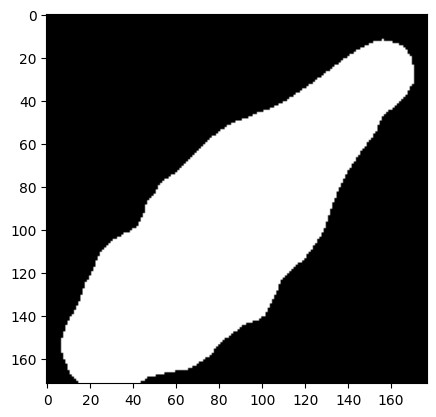

In [12]:
# as a way to have a better segmentation, we are using the biggest contour as cytoplasm (remove other cells cytoplasm).
# getting the contours and finding the bigger (cytoplasm + nucleus).

contours = cv.findContours(cv.bitwise_not(not_cytoplasm), cv.RETR_TREE, cv.CHAIN_APPROX_NONE) # RETR_EXTERNAL -> Evita q pegue contornos dentro de contornos, RETR_TREE.

areas = [cv.contourArea(contour) for contour in contours[0]]
index = np.argmax(areas)

not_cytoplasm = np.zeros_like(not_cytoplasm)

not_cytoplasm = cv.drawContours(not_cytoplasm, contours[0], index, 255, -1)

# convert to binary

_, not_cytoplasm = cv.threshold(not_cytoplasm, 127,255,cv.THRESH_BINARY)
not_cytoplasm = not_cytoplasm/255

# (x,y,w,h) = cv.boundingRect(contours[0][index])
# center = [int(x + w/2) , int(y + h/2)]
# p1 = x , y
# p2 = x + w , y + h
# print(x,y,w,h)

# image_bbox = cv.rectangle(not_cytoplasm.copy(), p1, p2, color = (0,0,0), thickness = 2)
# plt.imshow(image_bbox, cmap='gray')

plt.imshow(not_cytoplasm, cmap='gray')

In [13]:
print(np.unique(not_cytoplasm))
print(np.unique(nucleus))

[0. 1.]
[0. 1.]


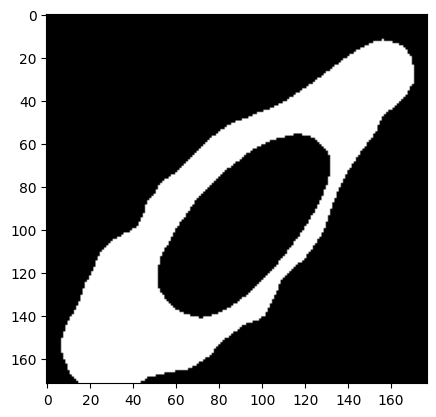

In [14]:
# simple subtraction.

cytoplasm = not_cytoplasm - nucleus

plt.imshow(cytoplasm, cmap = 'gray')

# Final result

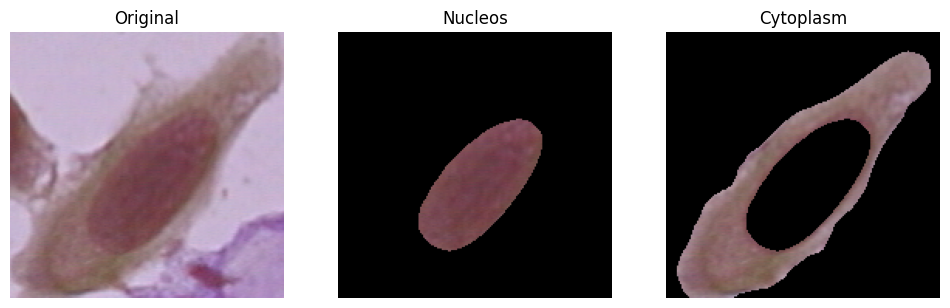

In [15]:
fix, ax = plt.subplots(1,3, figsize = (12,12))

plt.subplot(1,3,1)
plt.imshow(D1)
plt.title('Original')
plt.axis('off');

plt.subplot(1,3,2)
plt.imshow(D1*np.stack((nucleus/255,nucleus/255,nucleus/255)).transpose(1,2,0))
plt.title('Nucleos')
plt.axis('off');

plt.subplot(1,3,3)
plt.imshow(D1*np.stack((cytoplasm/255,cytoplasm/255,cytoplasm/255)).transpose(1,2,0))
plt.title('Cytoplasm')
plt.axis('off');

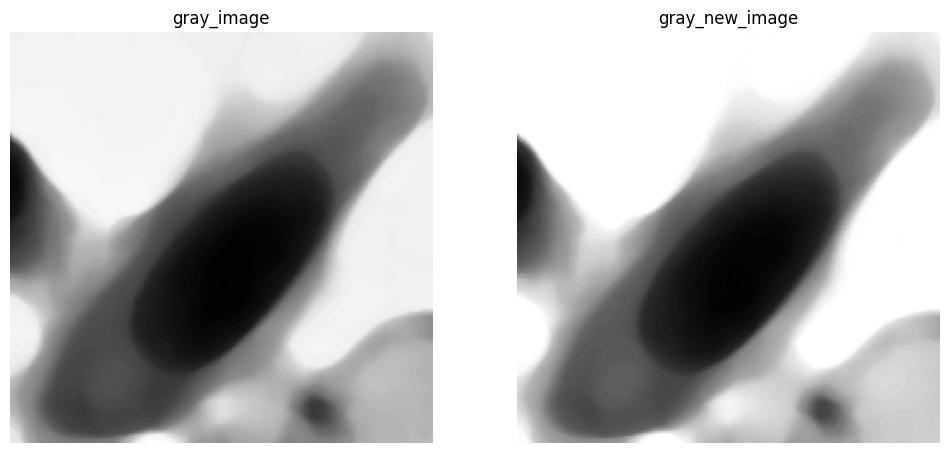

In [16]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray_new_image = cv.cvtColor(new_image, cv.COLOR_BGR2GRAY)


fix, ax = plt.subplots(1,2, figsize = (12,12))

plt.subplot(1,2,1)
plt.imshow(gray_image, cmap='gray')
plt.title('gray_image')
plt.axis('off');

plt.subplot(1,2,2)
plt.imshow(gray_new_image, cmap='gray')
plt.title('gray_new_image')
plt.axis('off');


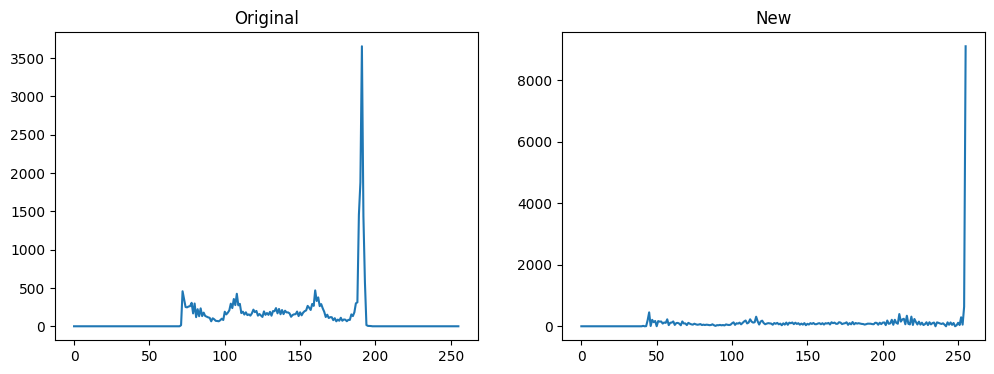

In [17]:
fix, ax = plt.subplots(1,2, figsize = (12,4))
channel = 0

plt.subplot(1,2,1)
plt.title('Original')
hist = cv.calcHist([gray_image],[channel],None,[256],[0,256]) # image, channel, mask (None = full image), hist size (bin), range of values.
plt.plot(hist)

plt.subplot(1,2,2)
plt.title('New')
new_hist = cv.calcHist([gray_new_image],[channel],None,[256],[0,256]) # image, channel, mask (None = full image), hist size (bin), range of values.
plt.plot(new_hist)

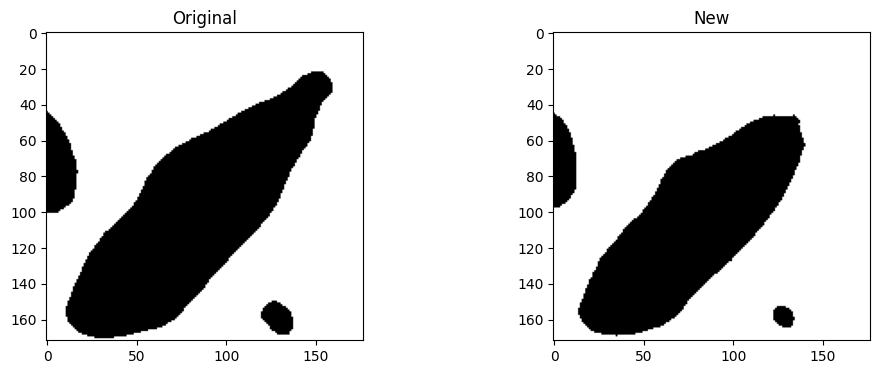

In [18]:
fix, ax = plt.subplots(1,2, figsize = (12,4))

plt.subplot(1,2,1)
plt.title('Original')
ret,th1 = cv.threshold(gray_image,127,255,cv.THRESH_BINARY)
plt.imshow(th1, cmap = 'gray')

plt.subplot(1,2,2)
plt.title('New')
ret,th1 = cv.threshold(gray_new_image,127,255,cv.THRESH_BINARY)
plt.imshow(th1, cmap = 'gray')

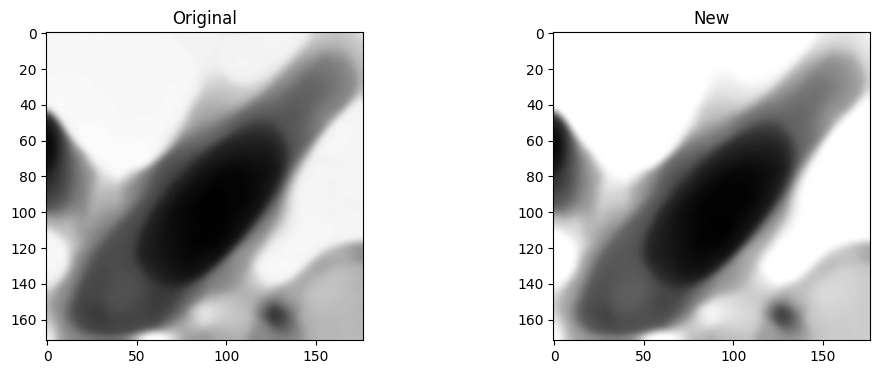

In [19]:
kernel = (5,5)
gray_image_blur = cv.blur(gray_image, kernel)
gray_new_image_blur = cv.blur(gray_new_image, kernel)


fix, ax = plt.subplots(1,2, figsize = (12,4))

plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(gray_image_blur, cmap = 'gray')

plt.subplot(1,2,2)
plt.title('New')
plt.imshow(gray_new_image_blur, cmap = 'gray')

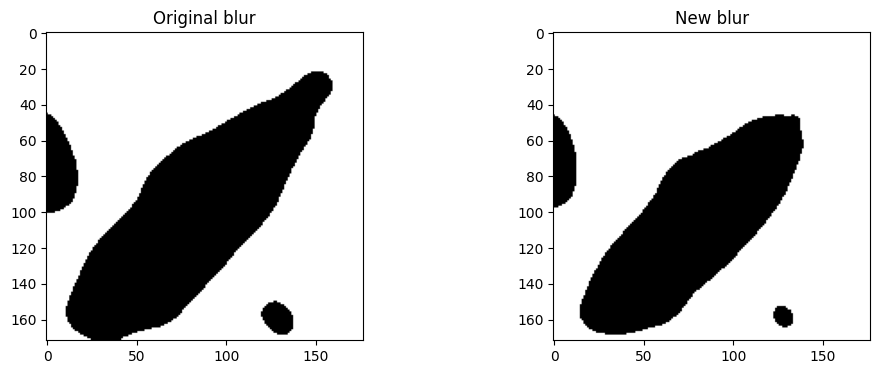

In [20]:
fix, ax = plt.subplots(1,2, figsize = (12,4))

plt.subplot(1,2,1)
plt.title('Original blur')
ret,th1 = cv.threshold(gray_image_blur,127,255,cv.THRESH_BINARY)
plt.imshow(th1, cmap = 'gray')

plt.subplot(1,2,2)
plt.title('New blur')
ret,th1 = cv.threshold(gray_new_image_blur,127,255,cv.THRESH_BINARY)
plt.imshow(th1, cmap = 'gray')

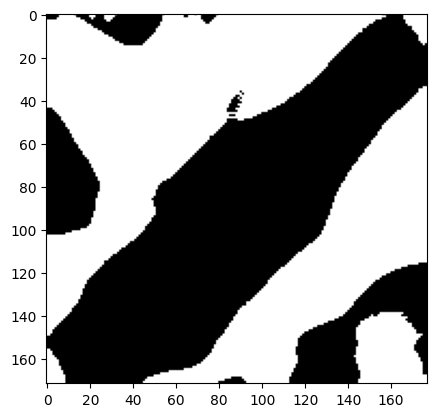

In [21]:
result = cv.adaptiveThreshold(gray_image_blur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,127,0)

#  pixel neighborhood size, constant to fine tunning threshold.

# result, thresh1 = cv.threshold(cv.cvtColor(image, cv.COLOR_BGR2GRAY),200,255,cv.THRESH_BINARY)
plt.imshow(result, cmap='gray')

[1 1 1 ... 4 4 4]
[[139.57146093  44.68221971  59.74994337]
 [254.99973929 251.88111584 254.99130964]
 [210.52552175 152.3303998  175.32260498]
 [176.5641428  108.79403688 110.88073754]
 [244.15201028 187.34863227 243.08371581]]
[0.14502036526080672, 0.37797267113388516, 0.13023912757850478, 0.1679477072657995, 0.1788201287610038]


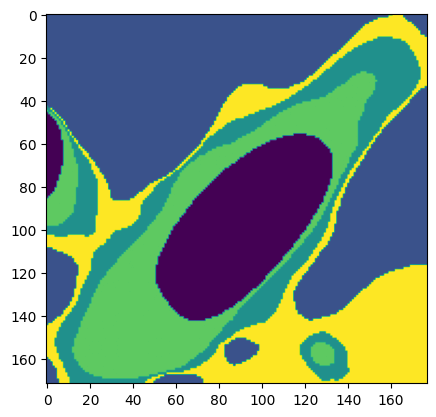

In [22]:
from sklearn.cluster import KMeans

image = new_image

# image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
img=image.reshape((image.shape[1]*image.shape[0],3))

kmeans=KMeans(n_clusters=5)
s=kmeans.fit(img)


labels=kmeans.labels_
print(labels)
labels=list(labels)

test = np.array(labels).reshape(image.shape[0:2])
plt.imshow(test)

centroid=kmeans.cluster_centers_
print(centroid)

percent=[]
for i in range(len(centroid)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)
print(percent)